## Feature Selection

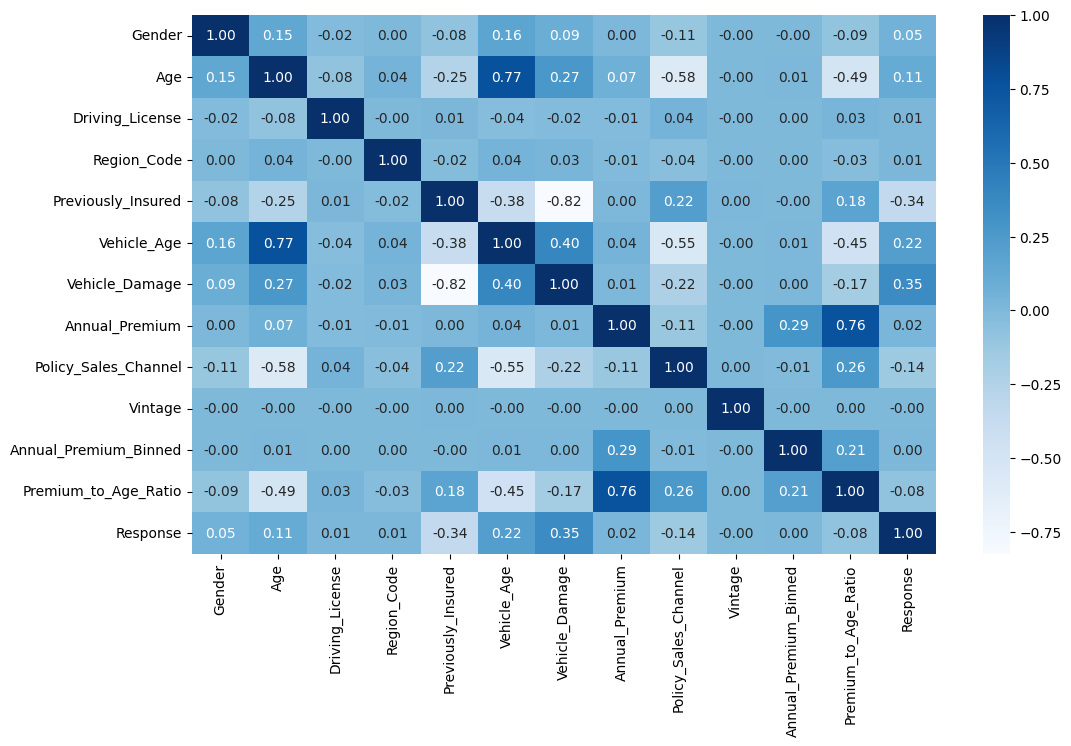

### 1. feature selection berdasarkan korelasi antara feature yang bernilai redundant/ > 0.7
    
  * Age di hapus dari data set

      Age dan Vehical Age bernilai Redundant yaitu 0.77, maka salah satunya harus dihapus dengan pertimbangan diantara kedua feature tersebut mana yang memiliki korelasi paling tinggi terhadap target
     
        Age terhadap target/ Response = 0.11
        Vehical Age terhadap target/ Response = 0.22
    Maka yang di hapus adalah feature Age

    * Previously_Insured dengan Vehicle_Damage benilai Redundant yaitu -0.82, akan tetapi di pertahankan    dengan pertimbangan :
    
      kedua feature bernilai Redundant yaitu -0.82 akan tetapi jika berasumsi terhadap kolom tersebut penting dalam menentukan response 0 atau 1 , kalau dilihat dari distribusinya Previously_Insured (customer sudah memiliki asuransi kendaraan atau belum) banyak berpengaruh pada response 1, begitu juga dengan Vehicle_Damage (customer pernah mengalami kerusakan kendaraan atau belum) terhadap response bernilai 1  distribusinya pada data set cukup banyak, bisa jadi karena pernah mengalami kerusakan kendaraan jadi customer tertarik untuk berlangganan asuransi kendaraan.

    *  Annual_Premium di hapus dari data set
    
       Premium_to_Age_Ratio dengan Annual_Premium bernilai redundant yaitu 0.76, maka salah satunya harus di hapus dengan pertimbangan diantara kedua feature tersebut mana yang memiliki korelasi paling tinggi terhadap target

       Premium_to_Age_Ratio terhadap target/ Response = 0.02
       Annual_Premium terhadap target/ Response = -0.08

       Maka Annual Premium di hapus dari data set.


### 2. Feature Selection berdasarkan pengujian untuk setiap Feature menggunakan Metode Mutual Information dan Chi-Square

In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from scipy.stats import chi2_contingency
# Membaca DataFrame dari file CSV
df = pd.read_csv('../../dataset/train_preprocessed_1.csv')

# Kolom yang akan dihapus
kolom_yang_dihapus = ['Age','Annual_Premium','Response']

# Menghilangkan kolom yang tidak dibutuhkan
features = df.drop(kolom_yang_dihapus, axis=1)
target = 'Response'

In [4]:

features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             381109 non-null  int64  
 1   Gender                 381109 non-null  int64  
 2   Driving_License        381109 non-null  int64  
 3   Region_Code            381109 non-null  float64
 4   Previously_Insured     381109 non-null  int64  
 5   Vehicle_Age            381109 non-null  int64  
 6   Vehicle_Damage         381109 non-null  int64  
 7   Policy_Sales_Channel   381109 non-null  float64
 8   Vintage                381109 non-null  int64  
 9   Annual_Premium_Binned  381109 non-null  int64  
 10  Premium_to_Age_Ratio   381109 non-null  float64
dtypes: float64(3), int64(8)
memory usage: 32.0 MB


In [5]:
features.head()

,Unnamed: 0,Gender,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Annual_Premium_Binned,Premium_to_Age_Ratio
0,0,1,1,28.0,0,2,1,26.0,217,0,919.409091
1,1,1,1,3.0,0,1,0,26.0,183,0,441.263158
2,2,1,1,28.0,0,2,1,26.0,27,0,814.765957
3,3,1,1,11.0,1,0,0,152.0,203,0,1362.809524
4,4,0,1,41.0,1,0,0,152.0,39,0,948.137931


#### Dilakukan Label Encoding untuk pengujian Mutual information dan Chi-Square karena feature harus bertipe kategorikal

In [6]:

from sklearn.preprocessing import LabelEncoder
for col in features.columns:
    le = LabelEncoder()
    features[col] = le.fit_transform(features[col])
features.head()

,Unnamed: 0,Gender,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Annual_Premium_Binned,Premium_to_Age_Ratio
0,0,1,1,28,0,2,1,24,207,0,118611
1,1,1,1,3,0,1,0,24,173,0,10159
2,2,1,1,28,0,2,1,24,17,0,94340
3,3,1,1,11,1,0,0,145,193,0,191412
4,4,0,1,41,1,0,0,145,29,0,124769


### pengujian Mutual information dapat dilakukan dengan menggunakan tipe data kategorikal ataupun numerikal
 
 Dengan Pertimbangan nilai Mutal Information
 
* Mutal Information < 0.02: tidak bisa digunakan untuk prediksi
* 0.02 ≤ Mutal Information < 0.1: weak predictor
* 0.1 ≤ Mutal Information < 0.3: moderate predictor
* 0.3 ≤ Mutal Information < 0.5: strong predictor
* Mutal Information ≥ 0.5: suspicious predictor

In [7]:

# Mutual Information dengan feature encoding

mutual_info_values = mutual_info_classif(features, df[target])
print("\nMutual Information:")
for column, mi in zip(features.columns, mutual_info_values):
    print(f"{column}: {mi}")




Mutual Information:
Unnamed: 0: 0.0003464056904018964
Gender: 0.053880472560130066
Driving_License: 0.07286284808195642
Region_Code: 0.017218617161234073
Previously_Insured: 0.13256430664373609
Vehicle_Age: 0.049441526135418856
Vehicle_Damage: 0.12046168633944854
Policy_Sales_Channel: 0.05687655191419072
Vintage: 0.0010596293783911026
Annual_Premium_Binned: 0.0
Premium_to_Age_Ratio: 0.012823880999119242


In [17]:
# Mutual Information dengan data set tidak dilakukan encoding

mutual_info_values = mutual_info_classif(df, df[target])
print("\nMutual Information:")
for column, mi in zip(features.columns, mutual_info_values):
    print(f"{column}: {mi}")




Mutual Information:
Unnamed: 0: 0.00024551081723322987
Gender: 0.05357936849937617
Driving_License: 0.031218096335019485
Region_Code: 0.07358072599666032
Previously_Insured: 0.017185036771637963
Vehicle_Age: 0.13313591563551874
Vehicle_Damage: 0.048312060573398874
Policy_Sales_Channel: 0.1205900176304191
Vintage: 0.0038498064404997034
Annual_Premium_Binned: 0.05681581980883332
Premium_to_Age_Ratio: 0.0005841086662905504


### pengujian Chi-Square dapat dilakukan dengan menggunakan tipe data kategorikal

* P-values < 0,05 ( nilai α yang Anda pilih) Anda menolak H₀ ( Hipotesis Null ) dan menerima H₁ ( Hipotesis Alternatif ). Artinya kedua variabel kategori tersebut bersifat dependen atau feature tersebut bergantung pada target (Response).

* P-values > 0,05 Anda menerima H₀ ( Hipotesis Nol ) dan menolak H₁ ( Hipotesis Alternatif ). Artinya kedua variabel kategori tersebut bersifat independen atau feature tersebut tidak bergantung pada target (Response).


In [9]:
# Chi-Square
chi2_values, p_values = chi2(features, df[target])
print("\nChi-Square:")
for column, chi2_val, p_val in zip(features.columns, chi2_values, p_values):
    print(f"{column}: {chi2_val}, p-value: {p_val}")



Chi-Square:
Unnamed: 0: 45312.273106534594, p-value: 0.0
Gender: 481.29529625164133, p-value: 1.1165826707522525e-106
Driving_License: 0.08373958768133248, p-value: 0.772292180446212
Region_Code: 282.40914014868537, p-value: 2.241871136828352e-63
Previously_Insured: 24033.827713218285, p-value: 0.0
Vehicle_Age: 9909.317235068691, p-value: 0.0
Vehicle_Damage: 23700.03582955424, p-value: 0.0
Policy_Sales_Channel: 185303.78547280587, p-value: 0.0
Vintage: 20.392874874522732, p-value: 6.3064161813884176e-06
Annual_Premium_Binned: 6.002394564157398, p-value: 0.014286475198091004
Premium_to_Age_Ratio: 166619477.2797608, p-value: 0.0


### Penjelasan Feature Selection berdasarkan pengujian untuk setiap Feature menggunakan Metode Mutual Information dan Chi-Square

###  Mutual Information 

Mutual information menggunakan data set yang dilakukan label encoding (Kategorikal) dengan Mutual   information menggunakan data set yang tidak dilakukan label encoding (numerikal) memiliki nilai mutual_info_values yang tidak jauh berbeda.


Mutual Information dilakukan label endoding:
* Gender: 0.053880472560130066
* Driving_License: 0.07286284808195642
* Region_Code: 0.017218617161234073
* Previously_Insured: 0.13256430664373609
* Vehicle_Age: 0.049441526135418856
* Vehicle_Damage: 0.12046168633944854
* Policy_Sales_Channel: 0.05687655191419072
* Vintage: 0.0010596293783911026
* Annual_Premium_Binned: 0.0
* Premium_to_Age_Ratio: 0.012823880999119242



Mutual Information tidak dilakukan label endoding:
* Gender: 0.05357936849937617
* Driving_License: 0.031218096335019485
* Region_Code: 0.07358072599666032
* Previously_Insured: 0.017185036771637963
* Vehicle_Age: 0.13313591563551874
* Vehicle_Damage: 0.048312060573398874
* Policy_Sales_Channel: 0.1205900176304191
* Vintage: 0.0038498064404997034
* Annual_Premium_Binned: 0.05681581980883332
* Premium_to_Age_Ratio: 0.0005841086662905504


Dapat dilihat dari nilai mutual_info_values dari kedua pengujian tersebut bahwa :
*  feature Vintage memiliki nilai < dari 0.02 di kedua pengujian, yang berarti feature tersebut tidak bisa digunakan untuk prediksi.
*  Feature remium_to_Age_Ratio memiliki nilai < 0.02 di kedua pengujian, yang berarti feature tersebut tidak bisa digunakan untuk prediksi.


###  Chi- square
 
* Gender: 481.29529625164133, p-value: 1.1165826707522525e-106
* Driving_License: 0.08373958768133248, p-value: 0.772292180446212
* Region_Code: 282.40914014868537, p-value: 2.241871136828352e-63
* Previously_Insured: 24033.827713218285, p-value: 0.0
* Vehicle_Age: 9909.317235068691, p-value: 0.0
* Vehicle_Damage: 23700.03582955424, p-value: 0.0
* Policy_Sales_Channel: 185303.78547280587, p-value: 0.0
* Vintage: 20.392874874522732, p-value: 6.3064161813884176e-06
* Annual_Premium_Binned: 6.002394564157398, p-value: 0.014286475198091004
* Premium_to_Age_Ratio: 166619477.2797608, p-value: 0.0

 Dapat dilihat  hasil pengujian menggunakan metode Chi-square bahwa :
*  feature Gender, Driving_License, Region_Code, dan Vintage memiliki nilai p_values > 0,05 dimana feature menerima H₀ ( Hipotesis Nol ) dan menolak H₁ ( Hipotesis Alternatif ). Artinya kedua variabel kategori tersebut bersifat independen atau feature tersebut tidak bergantung pada target (Response).
* feature lainnya < 0,05 ( nilai α yang Anda pilih) Anda menolak H₀ ( Hipotesis Null ) dan menerima H₁ ( Hipotesis Alternatif ). Artinya kedua variabel kategori tersebut bersifat dependen atau feature tersebut bergantung pada target (Response).

# Kesimpulan 

* Feature Vintage harus di hapus dari data set berdasarkan pertimbangan dari hasil pengujian menggunakan metode Mutual Information dan Chi-Square



In [19]:
df.head()

,Unnamed: 0,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Annual_Premium_Binned,Premium_to_Age_Ratio,Response
0,0,1,44,1,28.0,0,2,1,40454.0,26.0,217,0,919.409091,1
1,1,1,76,1,3.0,0,1,0,33536.0,26.0,183,0,441.263158,0
2,2,1,47,1,28.0,0,2,1,38294.0,26.0,27,0,814.765957,1
3,3,1,21,1,11.0,1,0,0,28619.0,152.0,203,0,1362.809524,0
4,4,0,29,1,41.0,1,0,0,27496.0,152.0,39,0,948.137931,0


In [23]:
kolom_yang_dihapus = ['Age','Annual_Premium','Response','Vintage']

# Menghilangkan kolom yang tidak dibutuhkan
df_new = df.drop(kolom_yang_dihapus, axis=1)
df_new.head()

,Unnamed: 0,Gender,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Annual_Premium_Binned,Premium_to_Age_Ratio
0,0,1,1,28.0,0,2,1,26.0,0,919.409091
1,1,1,1,3.0,0,1,0,26.0,0,441.263158
2,2,1,1,28.0,0,2,1,26.0,0,814.765957
3,3,1,1,11.0,1,0,0,152.0,0,1362.809524
4,4,0,1,41.0,1,0,0,152.0,0,948.137931


In [25]:
df_new.to_csv('../../dataset/train_feature_selection.csv')